# Credit Card Prediction Analysis!

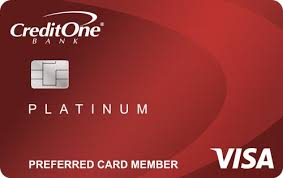

# Context

Credit score cards are a common risk control method in the financial industry. It uses personal information and data submitted by credit card applicants to predict the probability of future defaults and credit card borrowings. The bank is able to decide whether to issue a credit card to the applicant. Credit scores can objectively quantify the magnitude of risk.

Generally speaking, credit score cards are based on historical data. Once encountering large economic fluctuations. Past models may lose their original predictive power. Logistic model is a common method for credit scoring. Because Logistic is suitable for binary classification tasks and can calculate the coefficients of each feature. In order to facilitate understanding and operation, the score card will multiply the logistic regression coefficient by a certain value (such as 100) and round it.
 
At present, with the development of machine learning algorithms. More predictive methods such as Boosting, Random Forest, and Support Vector Machines have been introduced into credit card scoring. However, these methods often do not have good transparency. It may be difficult to provide customers and regulators with a reason for rejection or acceptance.
 


# Task
Build a machine learning model to predict if an applicant is 'good' or 'bad' client, different from other tasks, the definition of 'good' or 'bad' is not given. You should use some techique, such as vintage analysis to construct you label. Also, unbalance data problem is a big problem in this task.

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extracting data using two data sources

In [2]:
app = pd.read_csv("application_record.csv")
crecord = pd.read_csv("credit_record.csv")

* Using different methods to understand data
* data is complex and both dataset need some kind of transformation before analysis
* datasets are indivudally dealt with and then eventually compiled using joins

In [3]:
app.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [4]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [5]:
crecord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [6]:
app['ID'].nunique() # the total rows are 438,557. This means it has duplicates

438510

In [7]:
crecord['ID'].nunique() 
# this has around 43,000 unique rows as there are repeating entries for different monthly values and status.

45985

In [8]:
len(set(crecord['ID']).intersection(set(app['ID']))) # checking to see how many records match in two datasets

36457

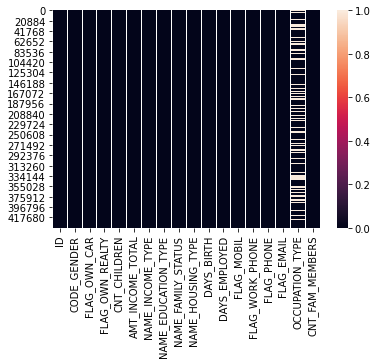

In [9]:
sns.heatmap(app.isnull()) # checking for null values. Seems like occupation_type has many

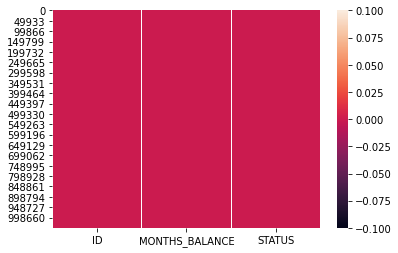

In [10]:
sns.heatmap(crecord.isnull()) # checking for null values. All good here!

In [11]:
app = app.drop_duplicates('ID', keep='last') 
# we identified that there are some duplicates in this dataset
# we will be deleting those duplicates and will keep the last entry of the ID if its repeated.

In [12]:
app.drop('OCCUPATION_TYPE', axis=1, inplace=True) 
#we identified earlier that occupation_type has many missing values
# we will drop this column

**add by us for future inspection:**

In [13]:
# Check if there are categorical varibles that we need to make dummies for
print(app.dtypes)
# Get a list of which variables are categorical
categorical_features  = [i for i in range(len(app.dtypes)) if app.dtypes[i]=='object']
print("Indices of categorical features: ", categorical_features)

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
CNT_FAM_MEMBERS        float64
dtype: object
Indices of categorical features:  [1, 2, 3, 6, 7, 8, 9]


In [14]:
app_d = app.copy()

**end**

In [15]:
ot = pd.DataFrame(app.dtypes =='object').reset_index()
object_type = ot[ot[0] == True]['index']
object_type
#we are filtering the columns that have non numeric values to see if they are useful

1            CODE_GENDER
2           FLAG_OWN_CAR
3        FLAG_OWN_REALTY
6       NAME_INCOME_TYPE
7    NAME_EDUCATION_TYPE
8     NAME_FAMILY_STATUS
9      NAME_HOUSING_TYPE
Name: index, dtype: object

In [16]:
num_type = pd.DataFrame(app.dtypes != 'object').reset_index().rename(columns =  {0:'yes/no'})
num_type = num_type[num_type['yes/no'] ==True]['index']
#HAVE CREATED SEPARATE LIST FOR NUMERIC TYPE INCASE IT WILL BE NEEDED IN FURTHER ANALYSIS
# IT IS NEEDED IN FURTHER ANALYSIS

In [17]:
app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438510 entries, 0 to 438556
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438510 non-null  int64  
 1   CODE_GENDER          438510 non-null  object 
 2   FLAG_OWN_CAR         438510 non-null  object 
 3   FLAG_OWN_REALTY      438510 non-null  object 
 4   CNT_CHILDREN         438510 non-null  int64  
 5   AMT_INCOME_TOTAL     438510 non-null  float64
 6   NAME_INCOME_TYPE     438510 non-null  object 
 7   NAME_EDUCATION_TYPE  438510 non-null  object 
 8   NAME_FAMILY_STATUS   438510 non-null  object 
 9   NAME_HOUSING_TYPE    438510 non-null  object 
 10  DAYS_BIRTH           438510 non-null  int64  
 11  DAYS_EMPLOYED        438510 non-null  int64  
 12  FLAG_MOBIL           438510 non-null  int64  
 13  FLAG_WORK_PHONE      438510 non-null  int64  
 14  FLAG_PHONE           438510 non-null  int64  
 15  FLAG_EMAIL       

In [18]:
a = app[object_type]['CODE_GENDER'].value_counts()
b = app[object_type]['FLAG_OWN_CAR'].value_counts()
c = app[object_type]['FLAG_OWN_REALTY'].value_counts()
d = app[object_type]['NAME_INCOME_TYPE'].value_counts()
e = app[object_type]['NAME_EDUCATION_TYPE'].value_counts()
f = app[object_type]['NAME_FAMILY_STATUS'].value_counts()
g = app[object_type]['NAME_HOUSING_TYPE'].value_counts()

print( a,"\n",b,'\n', c, '\n', d, '\n', e, '\n', f, '\n', g)

#this is just to see what each column is. 
#It seems that all of them are important since there is very fine classifcation in each column.
# their effectiveness cannot be judged at this moment so we convert all of them to numeric values.

F    294412
M    144098
Name: CODE_GENDER, dtype: int64 
 N    275428
Y    163082
Name: FLAG_OWN_CAR, dtype: int64 
 Y    304043
N    134467
Name: FLAG_OWN_REALTY, dtype: int64 
 Working                 226087
Commercial associate    100739
Pensioner                75483
State servant            36184
Student                     17
Name: NAME_INCOME_TYPE, dtype: int64 
 Secondary / secondary special    301789
Higher education                 117509
Incomplete higher                 14849
Lower secondary                    4051
Academic degree                     312
Name: NAME_EDUCATION_TYPE, dtype: int64 
 Married                 299798
Single / not married     55268
Civil marriage           36524
Separated                27249
Widow                    19671
Name: NAME_FAMILY_STATUS, dtype: int64 
 House / apartment      393788
With parents            19074
Municipal apartment     14213
Rented apartment         5974
Office apartment         3922
Co-op apartment          1539
Name: NAM

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_names = {}
for x in app:
    if app[x].dtypes=='object':
        app[x] = le.fit_transform(app[x])

# we have transformed all the non numeric data columns into data columns
# this method applies 0,1.. classification to different value types.

In [20]:
app[num_type].head()
# We will look at numeric columns and see if there is anything that needs to be changed. 

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
0,5008804,0,427500.0,-12005,-4542,1,1,0,0,2.0
1,5008805,0,427500.0,-12005,-4542,1,1,0,0,2.0
2,5008806,0,112500.0,-21474,-1134,1,0,0,0,2.0
3,5008808,0,270000.0,-19110,-3051,1,0,1,1,1.0
4,5008809,0,270000.0,-19110,-3051,1,0,1,1,1.0


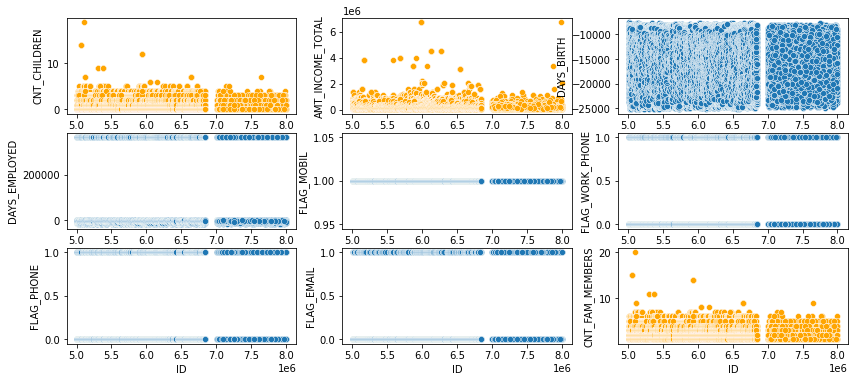

In [21]:
fig, ax= plt.subplots(nrows= 3, ncols = 3, figsize= (14,6))

sns.scatterplot(x='ID', y='CNT_CHILDREN', data=app, ax=ax[0][0], color= 'orange')
sns.scatterplot(x='ID', y='AMT_INCOME_TOTAL', data=app, ax=ax[0][1], color='orange')
sns.scatterplot(x='ID', y='DAYS_BIRTH', data=app, ax=ax[0][2])
sns.scatterplot(x='ID', y='DAYS_EMPLOYED', data=app, ax=ax[1][0])
sns.scatterplot(x='ID', y='FLAG_MOBIL', data=app, ax=ax[1][1])
sns.scatterplot(x='ID', y='FLAG_WORK_PHONE', data=app, ax=ax[1][2])
sns.scatterplot(x='ID', y='FLAG_PHONE', data=app, ax=ax[2][0])
sns.scatterplot(x='ID', y='FLAG_EMAIL', data=app, ax=ax[2][1])
sns.scatterplot(x='ID', y='CNT_FAM_MEMBERS', data=app, ax=ax[2][2], color= 'orange')

There are outliers in 3 columns.
1. CNT_CHILDREN
2. AMT_INCOME_TOTAL
3. CNT_FAM_MEMBERS

* We need to remove these outliers to make sure they do not affect our model results. 
* We will now remove these outliers. 

In [22]:
# FOR CNT_CHILDREN COLUMN
q_hi = app['CNT_CHILDREN'].quantile(0.999)
q_low = app['CNT_CHILDREN'].quantile(0.001)
app = app[(app['CNT_CHILDREN']>q_low) & (app['CNT_CHILDREN']<q_hi)]

In [23]:
# FOR AMT_INCOME_TOTAL COLUMN
q_hi = app['AMT_INCOME_TOTAL'].quantile(0.999)
q_low = app['AMT_INCOME_TOTAL'].quantile(0.001)
app= app[(app['AMT_INCOME_TOTAL']>q_low) & (app['AMT_INCOME_TOTAL']<q_hi)]

In [24]:
#FOR CNT_FAM_MEMBERS COLUMN
q_hi = app['CNT_FAM_MEMBERS'].quantile(0.999)
q_low = app['CNT_FAM_MEMBERS'].quantile(0.001)
app= app[(app['CNT_FAM_MEMBERS']>q_low) & (app['CNT_FAM_MEMBERS']<q_hi)]

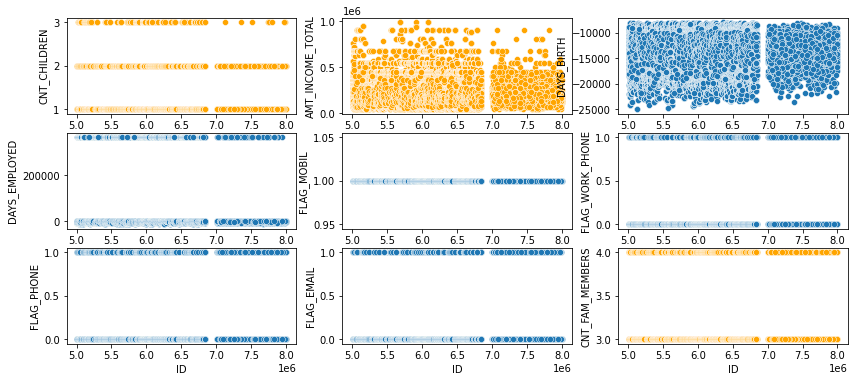

In [25]:
fig, ax= plt.subplots(nrows= 3, ncols = 3, figsize= (14,6))

sns.scatterplot(x='ID', y='CNT_CHILDREN', data=app, ax=ax[0][0], color= 'orange')
sns.scatterplot(x='ID', y='AMT_INCOME_TOTAL', data=app, ax=ax[0][1], color='orange')
sns.scatterplot(x='ID', y='DAYS_BIRTH', data=app, ax=ax[0][2])
sns.scatterplot(x='ID', y='DAYS_EMPLOYED', data=app, ax=ax[1][0])
sns.scatterplot(x='ID', y='FLAG_MOBIL', data=app, ax=ax[1][1])
sns.scatterplot(x='ID', y='FLAG_WORK_PHONE', data=app, ax=ax[1][2])
sns.scatterplot(x='ID', y='FLAG_PHONE', data=app, ax=ax[2][0])
sns.scatterplot(x='ID', y='FLAG_EMAIL', data=app, ax=ax[2][1])
sns.scatterplot(x='ID', y='CNT_FAM_MEMBERS', data=app, ax=ax[2][2], color= 'orange')

In [26]:
crecord['Months from today'] = crecord['MONTHS_BALANCE']*-1
crecord = crecord.sort_values(['ID','Months from today'], ascending=True)
crecord.head(10)
# we calculated months from today column to see how much old is the month
# we also sort the data according to ID and Months from today columns. 

,ID,MONTHS_BALANCE,STATUS,Months from today
0,5001711,0,X,0
1,5001711,-1,0,1
2,5001711,-2,0,2
3,5001711,-3,0,3
4,5001712,0,C,0
5,5001712,-1,C,1
6,5001712,-2,C,2
7,5001712,-3,C,3
8,5001712,-4,C,4
9,5001712,-5,C,5


In [27]:

crecord['STATUS'].value_counts() 
# performed a value count on status to see how many values exist of each type

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

In [28]:
crecord['STATUS'].replace({'C': 0, 'X' : 0}, inplace=True)
crecord['STATUS'] = crecord['STATUS'].astype('int')
crecord['STATUS'] = crecord['STATUS'].apply(lambda x:1 if x >= 2 else 0)
# replace the value C and X with 0 as it is the same type
# 1,2,3,4,5 are classified as 1 because they are the same type
# these will be our labels/prediction results for our model

In [29]:
crecord['STATUS'].value_counts(normalize=True) 
# there is a problem here
# the data is oversampled for the labels
# 0 are 99%
# 1 are only 1% in the whole dataset
# we will need to address the oversampling issue in order to make sense of our analysis
# this will be done after when we combine both the datasets
# so first we will join the datasets

0    0.99704
1    0.00296
Name: STATUS, dtype: float64

In [30]:
crecordgb = crecord.groupby('ID').agg(max).reset_index()
crecordgb.head() 
#we are grouping the data in crecord by ID so that we can join it with app

,ID,MONTHS_BALANCE,STATUS,Months from today
0,5001711,0,0,3
1,5001712,0,0,18
2,5001713,0,0,21
3,5001714,0,0,14
4,5001715,0,0,59


In [31]:
df = app.join(crecordgb.set_index('ID'), on='ID', how='inner')
df.drop(['Months from today', 'MONTHS_BALANCE'], axis=1, inplace=True)
df.head()
# no that this is joined, we will solve over sampling issue

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,STATUS
29,5008838,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,3.0,0
30,5008839,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,3.0,0
31,5008840,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,3.0,0
32,5008841,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,3.0,0
33,5008842,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,3.0,0


df.info() # checking for number of rows. 
# there are 9516 rows.

In [32]:
df.info() # checking for number of rows. 
# there are 9516 rows.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9516 entries, 29 to 434805
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   9516 non-null   int64  
 1   CODE_GENDER          9516 non-null   int64  
 2   FLAG_OWN_CAR         9516 non-null   int64  
 3   FLAG_OWN_REALTY      9516 non-null   int64  
 4   CNT_CHILDREN         9516 non-null   int64  
 5   AMT_INCOME_TOTAL     9516 non-null   float64
 6   NAME_INCOME_TYPE     9516 non-null   int64  
 7   NAME_EDUCATION_TYPE  9516 non-null   int64  
 8   NAME_FAMILY_STATUS   9516 non-null   int64  
 9   NAME_HOUSING_TYPE    9516 non-null   int64  
 10  DAYS_BIRTH           9516 non-null   int64  
 11  DAYS_EMPLOYED        9516 non-null   int64  
 12  FLAG_MOBIL           9516 non-null   int64  
 13  FLAG_WORK_PHONE      9516 non-null   int64  
 14  FLAG_PHONE           9516 non-null   int64  
 15  FLAG_EMAIL           9516 non-null 

                           ID  CODE_GENDER  ...  CNT_FAM_MEMBERS    STATUS
ID                   1.000000     0.015532  ...        -0.000114  0.000547
CODE_GENDER          0.015532     1.000000  ...         0.027254  0.017239
FLAG_OWN_CAR        -0.035491     0.322843  ...         0.045470 -0.007128
FLAG_OWN_REALTY     -0.153538    -0.043881  ...        -0.007657 -0.043431
CNT_CHILDREN         0.010956     0.006713  ...         0.954028 -0.004371
AMT_INCOME_TOTAL    -0.056009     0.262009  ...        -0.033397  0.011574
NAME_INCOME_TYPE    -0.009021     0.039729  ...         0.028828 -0.009591
NAME_EDUCATION_TYPE  0.008610     0.052322  ...        -0.027756 -0.024704
NAME_FAMILY_STATUS   0.036333     0.039380  ...         0.035615  0.048071
NAME_HOUSING_TYPE    0.016796     0.019751  ...        -0.031696 -0.004606
DAYS_BIRTH           0.031523    -0.054445  ...         0.025276  0.004938
DAYS_EMPLOYED       -0.015962    -0.006220  ...        -0.032932  0.003763
FLAG_MOBIL               

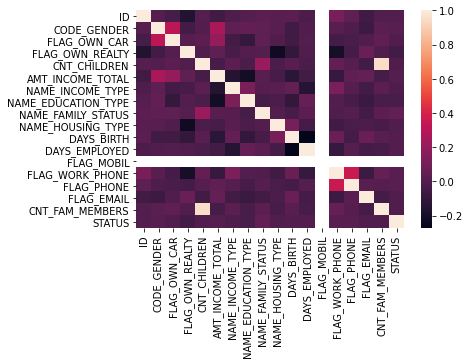

In [33]:
sns.heatmap(df.corr())
print(df.corr())


In [34]:
X = df.iloc[:,1:-1] # X value contains all the variables except labels
y = df.iloc[:,-1] # these are the labels

In [35]:
app_d.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1.0


In [36]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,STATUS
29,5008838,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,3.0,0
30,5008839,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,3.0,0
31,5008840,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,3.0,0
32,5008841,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,3.0,0
33,5008842,1,0,1,1,405000.0,0,1,1,1,-11842,-2016,1,0,0,0,3.0,0


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)
# we create the test train split first

In [38]:
X_train

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
19202,1,0,0,1,135000.0,4,4,1,1,-10116,-880,1,0,0,0,3.0
32853,1,0,0,1,270000.0,4,4,1,1,-9943,-554,1,1,0,0,3.0
21023,0,0,1,1,270000.0,4,4,1,1,-15608,-2755,1,0,0,0,3.0
20700,0,0,1,1,202500.0,4,4,1,1,-14152,-4673,1,0,0,0,3.0
2231,0,0,1,1,121500.0,4,1,1,1,-11007,-762,1,0,0,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45374,0,1,0,1,247500.0,4,4,1,1,-18434,-2483,1,1,1,0,3.0
8662,1,1,0,1,238500.0,4,1,1,5,-11384,-1965,1,1,1,0,3.0
39488,1,1,1,1,157500.0,0,4,1,1,-14291,-1988,1,1,0,0,3.0
15177,0,0,1,1,126000.0,4,4,0,1,-14616,-4543,1,1,1,1,3.0


In [39]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_scaled = pd.DataFrame(mms.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(mms.transform(X_test), columns=X_test.columns)
# we have now fit and transform the data into a scaler for accurate reading and results.

In [40]:
X_scaled['NAME_EDUCATION_TYPE'].value_counts()

1.00    4265
0.25    2040
0.50     289
0.75      57
0.00      10
Name: NAME_EDUCATION_TYPE, dtype: int64

In [41]:
X_scaled['CODE_GENDER'].value_counts()

0.0    3912
1.0    2749
Name: CODE_GENDER, dtype: int64

In [42]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_balanced, y_balanced = oversample.fit_resample(X_scaled, y_train)
X_test_balanced, y_test_balanced = oversample.fit_resample(X_test_scaled, y_test)
# we have addressed the issue of oversampling here

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

In [43]:
X_balanced_df = pd.DataFrame(X_balanced, columns=X_train.columns)
X_balanced_df['CODE_GENDER'].value_counts()

0.000000    6668
1.000000    5720
0.420913       1
0.485294       1
0.442404       1
            ... 
0.193021       1
0.542421       1
0.961812       1
0.631095       1
0.889860       1
Name: CODE_GENDER, Length: 718, dtype: int64

In [44]:
X_balanced_df['NAME_EDUCATION_TYPE'].value_counts()

1.000000    7028
0.250000    3821
0.500000     323
0.750000      57
0.000000      10
            ... 
0.853264       1
0.875950       1
0.440201       1
0.788679       1
0.953485       1
Name: NAME_EDUCATION_TYPE, Length: 1870, dtype: int64

In [45]:
y_train.value_counts()

0    6552
1     109
Name: STATUS, dtype: int64

In [46]:
y_df_balanced = pd.DataFrame(y_balanced, columns=['y_balanced'])

In [47]:
y_df_balanced['y_balanced'].value_counts()

1    6552
0    6552
Name: y_balanced, dtype: int64

In [48]:
y_test.value_counts()

0    2813
1      42
Name: STATUS, dtype: int64

In [49]:
y_df_test_balanced = pd.DataFrame(y_test_balanced, columns=['y_test_balanced'])

In [50]:
y_df_test_balanced['y_test_balanced'].value_counts()

1    2813
0    2813
Name: y_test_balanced, dtype: int64

* We notice in the value counts above that label types are now balanced
* the problem of oversampling is solved now
* we will now implement different models to see which one performs the best

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [52]:
classifiers = {
    "LogisticRegression" : LogisticRegression(),
    "KNeighbors" : KNeighborsClassifier(),
    "SVC" : SVC(),
    "DecisionTree" : DecisionTreeClassifier(),
    "RandomForest" : RandomForestClassifier(),
    "XGBoost" : XGBClassifier()
}

In [53]:
train_scores = []
test_scores = []

for key, classifier in classifiers.items():
    classifier.fit(X_balanced, y_balanced)
    train_score = classifier.score(X_balanced, y_balanced)
    train_scores.append(train_score)
    test_score = classifier.score(X_test_balanced, y_test_balanced)
    test_scores.append(test_score)

print(train_scores)
print(test_scores)

[0.6465201465201466, 0.9784035409035409, 0.9349053724053724, 0.9943528693528694, 0.9943528693528694, 0.956425518925519]
[0.5085318165659438, 0.7161393530039104, 0.7502666192676858, 0.833274084607181, 0.779950231070032, 0.8876644152150729]


* We found out that XGBoost model is performing best on the train set as well as test set with 91% accuracy
* We will be using XGBoost to predict our values.

In [54]:
xgb = XGBClassifier()
model = xgb.fit(X_balanced, y_balanced)
prediction = xgb.predict(X_test_balanced)

In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test_balanced, prediction))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      2813
           1       0.94      0.83      0.88      2813

    accuracy                           0.89      5626
   macro avg       0.89      0.89      0.89      5626
weighted avg       0.89      0.89      0.89      5626



# SUPERVISION OF THE ADS FROM OUR TEAM

## Overall Accuracy

In [56]:
overall_accuracy = pd.DataFrame(np.array([train_scores,test_scores]),
                                columns=["LogisticRegression","KNeighborsClassifier",
                                         "SVC","DecisionTreeClassifier",
                                         "RandomForestClassifier","XGBClassifier"],
                                index = ["training","testing"])
overall_accuracy

,LogisticRegression,KNeighborsClassifier,SVC,DecisionTreeClassifier,RandomForestClassifier,XGBClassifier
training,0.646520,0.978404,0.934905,0.994353,0.994353,0.956426
testing,0.508532,0.716139,0.750267,0.833274,0.779950,0.887664


## Accuracy for male:

In [57]:
df_balanced = pd.DataFrame(X_balanced, columns=X_train.columns)
df_balanced['STATUS'] = y_balanced
df_balanced.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,STATUS
0,1.0,0.0,0.0,0.0,0.105263,1.0,1.00,0.25,0.2,0.868941,0.035798,0.0,0.0,0.0,0.0,0.0,0
1,1.0,0.0,0.0,0.0,0.263158,1.0,1.00,0.25,0.2,0.879556,0.036656,0.0,1.0,0.0,0.0,0.0,0
2,0.0,0.0,1.0,0.0,0.263158,1.0,1.00,0.25,0.2,0.531967,0.030860,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,1.0,0.0,0.184211,1.0,1.00,0.25,0.2,0.621303,0.025809,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,1.0,0.0,0.089474,1.0,0.25,0.25,0.2,0.814272,0.036109,0.0,0.0,0.0,0.0,0.0,1


In [58]:
X_balanced_male = df_balanced.loc[df_balanced['CODE_GENDER'] == 1, ].iloc[:,:-1].to_numpy()
y_balanced_male = df_balanced.loc[df_balanced['CODE_GENDER'] == 1, ].iloc[:,-1].to_numpy()

In [59]:
df_test_balanced = pd.DataFrame(X_test_balanced, columns=X_train.columns)
df_test_balanced['STATUS'] = y_test_balanced
df_test_balanced.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,STATUS
0,1.0,1.0,0.0,0.0,0.215789,0.5,1.0,0.25,0.2,0.160326,0.026680,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.184211,1.0,1.0,0.25,0.2,0.764818,0.029514,0.0,1.0,1.0,0.0,0.0,0
2,0.0,0.0,1.0,0.5,0.157895,1.0,1.0,0.25,0.2,0.658731,0.036999,0.0,0.0,1.0,0.0,1.0,0
3,0.0,1.0,1.0,0.5,0.078947,1.0,1.0,0.25,0.2,0.673886,0.031653,0.0,0.0,0.0,1.0,1.0,0
4,0.0,0.0,1.0,0.5,0.026316,0.5,0.5,0.25,1.0,0.676095,0.037554,0.0,0.0,0.0,0.0,1.0,0


In [60]:
X_test_balanced_male = df_test_balanced.loc[df_test_balanced['CODE_GENDER'] == 1, ].iloc[:,:-1].to_numpy()
y_test_balanced_male = df_test_balanced.loc[df_test_balanced['CODE_GENDER'] == 1, ].iloc[:,-1].to_numpy()

In [61]:
train_scores_male = []
test_scores_male = []

for key, classifier in classifiers.items():
    classifier.fit(X_balanced, y_balanced)
    train_score_male = classifier.score(X_balanced_male, y_balanced_male)
    train_scores_male.append(train_score_male)
    test_score_male = classifier.score(X_test_balanced_male, y_test_balanced_male)
    test_scores_male.append(test_score_male)

print(train_scores_male)
print(test_scores_male)

[0.6548951048951049, 0.9826923076923076, 0.9400349650349651, 0.9935314685314686, 0.9935314685314686, 0.9498251748251748]
[0.5062195781503516, 0.7977285018929151, 0.7917793401838832, 0.9221200648999459, 0.8696592752839373, 0.9064359113034073]


In [62]:
male_accuracy = pd.DataFrame(np.array([train_scores_male,test_scores_male]),
                                columns=["LogisticRegression","KNeighborsClassifier",
                                         "SVC","DecisionTreeClassifier",
                                         "RandomForestClassifier","XGBClassifier"],
                                index = ["training","testing"])
male_accuracy

,LogisticRegression,KNeighborsClassifier,SVC,DecisionTreeClassifier,RandomForestClassifier,XGBClassifier
training,0.654895,0.982692,0.940035,0.993531,0.993531,0.949825
testing,0.506220,0.797729,0.791779,0.922120,0.869659,0.906436


## Accuracy for female:

In [63]:
X_balanced_female = df_balanced.loc[df_balanced['CODE_GENDER'] == 0, ].iloc[:,:-1].to_numpy()
y_balanced_female = df_balanced.loc[df_balanced['CODE_GENDER'] == 0, ].iloc[:,-1].to_numpy()

In [64]:

X_test_balanced_female = df_test_balanced.loc[df_test_balanced['CODE_GENDER'] == 0, ].iloc[:,:-1].to_numpy()
y_test_balanced_female = df_test_balanced.loc[df_test_balanced['CODE_GENDER'] == 0, ].iloc[:,-1].to_numpy()

In [65]:
train_scores_female = []
test_scores_female = []

for key, classifier in classifiers.items():
    classifier.fit(X_balanced, y_balanced)
    train_score_female = classifier.score(X_balanced_female, y_balanced_female)
    train_scores_female.append(train_score_female)
    test_score_female = classifier.score(X_test_balanced_female, y_test_balanced_female)
    test_scores_female.append(test_score_female)

print(train_scores_female)
print(test_scores_female)

[0.6460707858428314, 0.9727054589082184, 0.9281643671265747, 0.9944511097780444, 0.9944511097780444, 0.9593581283743251]
[0.5420207743153919, 0.7192319798552094, 0.7337110481586402, 0.7922568460812087, 0.7261567516525024, 0.8564683663833805]


In [66]:
female_accuracy = pd.DataFrame(np.array([train_scores_female,test_scores_female]),
                                columns=["LogisticRegression","KNeighborsClassifier",
                                         "SVC","DecisionTreeClassifier",
                                         "RandomForestClassifier","XGBClassifier"],
                                index = ["training","testing"])
female_accuracy

,LogisticRegression,KNeighborsClassifier,SVC,DecisionTreeClassifier,RandomForestClassifier,XGBClassifier
training,0.646071,0.972705,0.928164,0.994451,0.994451,0.959358
testing,0.542021,0.719232,0.733711,0.792257,0.726157,0.856468


## Disparate Impact

In [67]:
df_test_balanced_x = df_test_balanced.iloc[:,:-1].to_numpy()
df_test_balanced_y = df_test_balanced.iloc[:,-1].to_numpy()


In [68]:
!pip install numba==0.48
!pip install aif360==0.2.2

In [69]:
from aif360.datasets import GermanDataset, StandardDataset
from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric

In [70]:
privileged_groups = [{'CODE_GENDER': 1}] # a list
unprivileged_groups = [{'CODE_GENDER': 0}]

In [71]:
preds_results = pd.DataFrame()
temp_columns=["LogisticRegression","KNeighborsClassifier",
                                         "SVC","DecisionTreeClassifier",
                                         "RandomForestClassifier","XGBClassifier"]

In [72]:
columns=["LogisticRegression","KNeighborsClassifier",
                                         "SVC","DecisionTreeClassifier",
                                         "RandomForestClassifier","XGBClassifier"]

In [73]:
for key, classifier in classifiers.items():
    classifier.fit(df_test_balanced_x, df_test_balanced_y)
    preds_results[temp_columns[0]] = classifier.predict(X_balanced)
    del temp_columns[0]

In [74]:
train_preds_df = df_balanced
for name in columns:
  train_preds_df[name] = preds_results[name]
train_preds_df

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,STATUS,LogisticRegression,KNeighborsClassifier,SVC,DecisionTreeClassifier,RandomForestClassifier,XGBClassifier
0,1.000000,0.000000,0.0,0.0,0.105263,1.000000,1.000000,0.25,0.200000,0.868941,0.035798,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0
1,1.000000,0.000000,0.0,0.0,0.263158,1.000000,1.000000,0.25,0.200000,0.879556,0.036656,0.0,1.0,0.0,0.0,0.0,0,1,0,0,0,0,0
2,0.000000,0.000000,1.0,0.0,0.263158,1.000000,1.000000,0.25,0.200000,0.531967,0.030860,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0.000000,0.000000,1.0,0.0,0.184211,1.000000,1.000000,0.25,0.200000,0.621303,0.025809,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
4,0.000000,0.000000,1.0,0.0,0.089474,1.000000,0.250000,0.25,0.200000,0.814272,0.036109,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13099,0.966242,0.000000,1.0,0.0,0.104730,1.000000,0.250000,0.25,0.200000,0.670148,0.028686,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0
13100,1.000000,0.000000,1.0,0.0,0.112027,1.000000,0.442770,0.25,0.200000,0.630591,0.029350,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,1,1
13101,0.000000,0.400019,1.0,0.5,0.168419,1.000000,0.550014,0.25,0.200000,0.650190,0.026764,0.0,0.0,1.0,0.0,1.0,1,0,0,0,1,1,1
13102,0.000000,0.000000,1.0,0.0,0.084577,0.097103,0.854346,0.25,0.200000,0.395528,0.026933,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,1,1


In [75]:
orig_aif360 = StandardDataset(df_test_balanced, label_name='STATUS', protected_attribute_names=['CODE_GENDER'], 
                privileged_classes=[[1]], favorable_classes=[1])

In [76]:
evaluation_df = pd.DataFrame()

for name in columns:
  preds_df = df_test_balanced.drop("STATUS",axis = 1)
  preds_df["STATUS"] = train_preds_df[name]
  preds_aif360 = StandardDataset(preds_df, label_name='STATUS', protected_attribute_names=['CODE_GENDER'], 
                privileged_classes=[[1]], favorable_classes=[1])
  metric_orig_train = BinaryLabelDatasetMetric(
     preds_aif360, 
     unprivileged_groups=unprivileged_groups,
     privileged_groups=privileged_groups
  )

  orig_vs_noage_preds_metrics = ClassificationMetric(orig_aif360, preds_aif360,
                                                   unprivileged_groups=unprivileged_groups,
                                                   privileged_groups=privileged_groups)
  re_array = np.array([metric_orig_train.mean_difference(),
                       metric_orig_train.disparate_impact(),
                       orig_vs_noage_preds_metrics.false_positive_rate_ratio()])
  evaluation_df[name] = re_array.transpose()

In [77]:
evaluation_df.index = ["mean_difference","disparate_impact","false_positive_rate_ratio"]

In [78]:
evaluation_df

,LogisticRegression,KNeighborsClassifier,SVC,DecisionTreeClassifier,RandomForestClassifier,XGBClassifier
mean_difference,0.002568,-0.006860,-0.017108,-0.001786,-0.003480,-0.001932
disparate_impact,1.006586,0.863606,0.804735,0.872993,0.540424,0.897936
false_positive_rate_ratio,1.021465,0.996834,0.803758,1.432180,0.814081,0.904535


# Explaining models with SHAP

In [79]:
# Required installations
!pip install shap==0.39.0

In [80]:
# Import the required modules
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np
import shap
from IPython.display import Image
from IPython.core.display import HTML 
import operator
from collections import defaultdict
shap.initjs()

In [81]:
import xgboost
model = xgboost.XGBClassifier(n_estimators=200, max_depth=5)
model.fit(X_balanced, y_balanced)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [82]:
# Initialize the explainer
explainer = shap.Explainer(model, X_balanced)
# Apply it to the test data
shap_values = explainer.shap_values(X_test_balanced)

 98%|===================| 5513/5626 [00:33<00:00]       

In [83]:
feature_names_new = X_train.columns
feature_names_new

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS'],
      dtype='object')

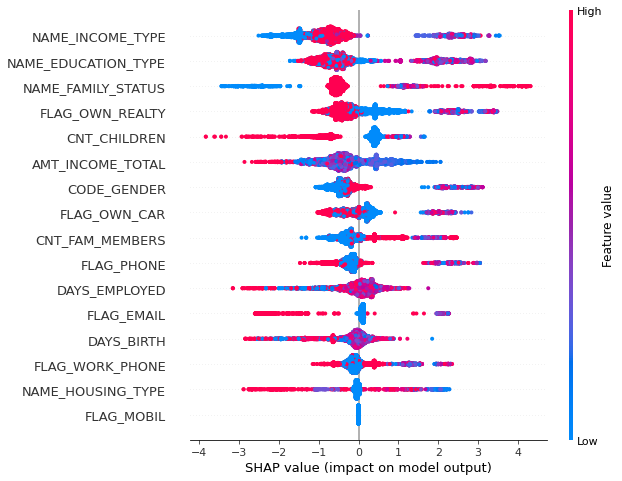

In [84]:
shap.summary_plot(shap_values, X_test_balanced, feature_names=feature_names_new)

In [85]:
shap.initjs()
idx = 50
print("Good credit " if y_test_balanced[idx]==0 else "Bad credit", "Review:")

shap.force_plot(
    explainer.expected_value, shap_values[idx], X_test_balanced[idx],
    feature_names=feature_names_new
)

Good credit  Review:


In [86]:
misclassified = []
for i in range(len(y_test_balanced)):
  pred_outcome = prediction[i]
  ground_truth = y_test_balanced[i]
  if (pred_outcome != ground_truth):
    misclassified.append(i)

In [87]:
misclassified[:20]

[17,
 36,
 37,
 39,
 61,
 72,
 78,
 113,
 116,
 118,
 130,
 164,
 176,
 196,
 220,
 234,
 237,
 257,
 264,
 296]

In [88]:
shap.initjs()
idx = misclassified[1]
print("Good credit " if y_test_balanced[idx]==0 else "Bad credit", "Review:")

shap.force_plot(
    explainer.expected_value, shap_values[idx], X_test_balanced[idx],
    feature_names=feature_names_new
)

Bad credit Review:


In [89]:
from sklearn.metrics import confusion_matrix
y_true = y_test_balanced
cf_matrix = confusion_matrix(y_true, prediction, labels=[0,1])

In [90]:
cf_matrix

array([[2658,  155],
       [ 477, 2336]])

### LIME

In [91]:
!pip install lime

In [92]:
%matplotlib inline

import sklearn.model_selection
import sklearn.metrics
import sklearn.datasets
import sklearn.ensemble
import sklearn.preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np
from IPython.display import Markdown, display
import matplotlib.pyplot as plt
import warnings
import lime
import lime.lime_tabular
from lime import submodular_pick
import xgboost
from xgboost import plot_importance
import json
from collections import OrderedDict

import pandas as pd

np.random.seed(1)


In [93]:
# Get a list of feature names (excluding the outcome variable)
feature_names = df.columns[:-1]
feature_names

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS'],
      dtype='object')

In [94]:
labels = df.iloc[:,-1]
labels

29        0
30        0
31        0
32        0
33        0
         ..
434779    1
434780    1
434782    1
434791    1
434805    1
Name: STATUS, Length: 9516, dtype: int64

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9516 entries, 29 to 434805
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   9516 non-null   int64  
 1   CODE_GENDER          9516 non-null   int64  
 2   FLAG_OWN_CAR         9516 non-null   int64  
 3   FLAG_OWN_REALTY      9516 non-null   int64  
 4   CNT_CHILDREN         9516 non-null   int64  
 5   AMT_INCOME_TOTAL     9516 non-null   float64
 6   NAME_INCOME_TYPE     9516 non-null   int64  
 7   NAME_EDUCATION_TYPE  9516 non-null   int64  
 8   NAME_FAMILY_STATUS   9516 non-null   int64  
 9   NAME_HOUSING_TYPE    9516 non-null   int64  
 10  DAYS_BIRTH           9516 non-null   int64  
 11  DAYS_EMPLOYED        9516 non-null   int64  
 12  FLAG_MOBIL           9516 non-null   int64  
 13  FLAG_WORK_PHONE      9516 non-null   int64  
 14  FLAG_PHONE           9516 non-null   int64  
 15  FLAG_EMAIL           9516 non-null 

In [96]:
gbtree = xgboost.XGBClassifier(n_estimators=200, max_depth=5)
gbtree.fit(X_balanced, y_balanced)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [97]:
categorical_names = {}
for feature in categorical_features:
    print("Feature: ", feature)
    # Use label encoder to map categories to numbers
    le = sklearn.preprocessing.LabelEncoder()
    le.fit(app_d.iloc[:, feature])
    # Replace the categories with corresponding numbers in the original data
    app_d.iloc[:, feature] = le.transform(app_d.iloc[:, feature])
    # Store and print the mappings for reference later
    categorical_names[feature] = le.classes_
    print(categorical_names[feature])
    print("==================================================")

Feature:  1
['F' 'M']
Feature:  2
['N' 'Y']
Feature:  3
['N' 'Y']
Feature:  6
['Commercial associate' 'Pensioner' 'State servant' 'Student' 'Working']
Feature:  7
['Academic degree' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Secondary / secondary special']
Feature:  8
['Civil marriage' 'Married' 'Separated' 'Single / not married' 'Widow']
Feature:  9
['Co-op apartment' 'House / apartment' 'Municipal apartment'
 'Office apartment' 'Rented apartment' 'With parents']


In [98]:
categorical_names

{1: array(['F', 'M'], dtype=object),
 2: array(['N', 'Y'], dtype=object),
 3: array(['N', 'Y'], dtype=object),
 6: array(['Commercial associate', 'Pensioner', 'State servant', 'Student',
        'Working'], dtype=object),
 7: array(['Academic degree', 'Higher education', 'Incomplete higher',
        'Lower secondary', 'Secondary / secondary special'], dtype=object),
 8: array(['Civil marriage', 'Married', 'Separated', 'Single / not married',
        'Widow'], dtype=object),
 9: array(['Co-op apartment', 'House / apartment', 'Municipal apartment',
        'Office apartment', 'Rented apartment', 'With parents'],
       dtype=object)}

In [99]:
for cat_var in categorical_names:
    print(cat_var)

1
2
3
6
7
8
9


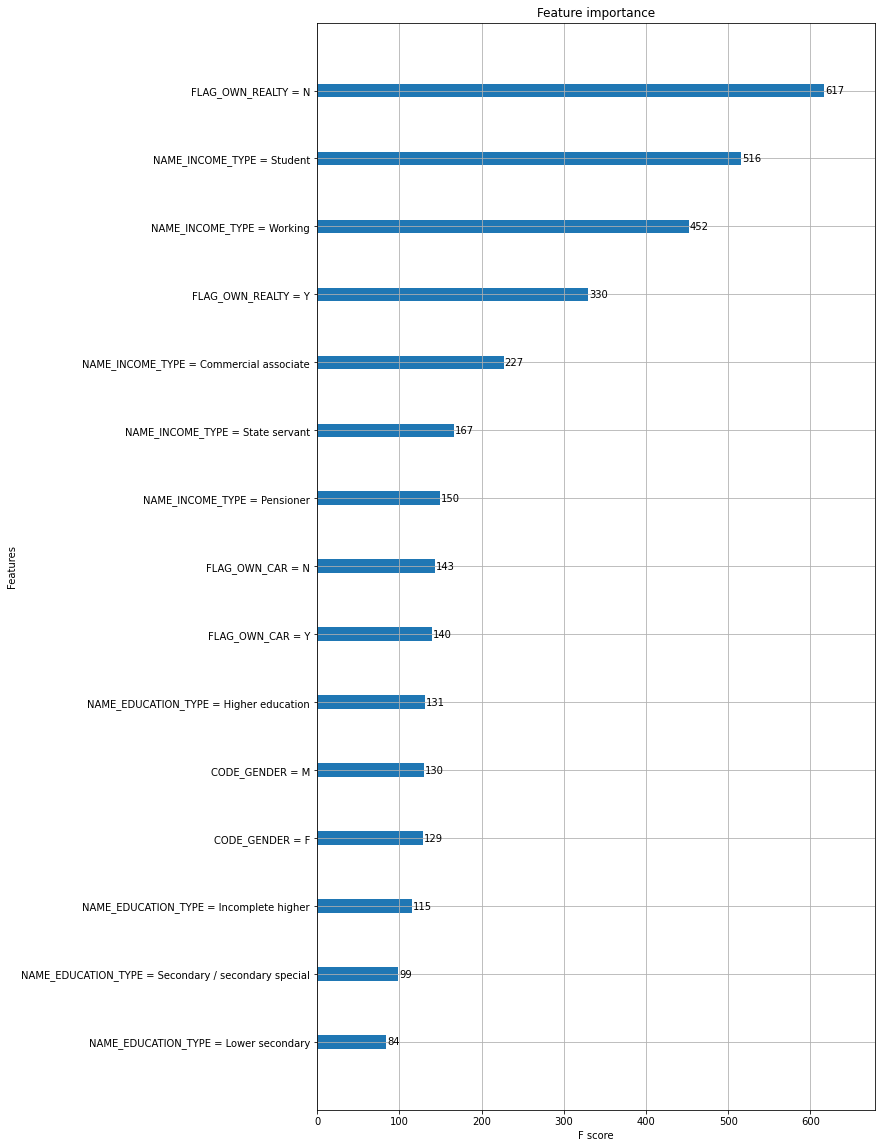

In [100]:
gbtree_features_orig = gbtree.get_booster().feature_names
gbtree_features = []
for cat_var in categorical_names:
    cat_var_names = [feature_names[cat_var] +" = " + cat for cat in categorical_names[cat_var]]
    gbtree_features.extend(cat_var_names)
gbtree_features.extend([feature_names[i] for i in range(len(feature_names)) if i not in categorical_features])
gbtree.get_booster().feature_names = gbtree_features

# Plot feature importances
plt.rcParams["figure.figsize"] = (10,20)
plot_importance(gbtree.get_booster())

In [101]:
categorical_features

[1, 2, 3, 6, 7, 8, 9]

In [102]:
categorical_names

{1: array(['F', 'M'], dtype=object),
 2: array(['N', 'Y'], dtype=object),
 3: array(['N', 'Y'], dtype=object),
 6: array(['Commercial associate', 'Pensioner', 'State servant', 'Student',
        'Working'], dtype=object),
 7: array(['Academic degree', 'Higher education', 'Incomplete higher',
        'Lower secondary', 'Secondary / secondary special'], dtype=object),
 8: array(['Civil marriage', 'Married', 'Separated', 'Single / not married',
        'Widow'], dtype=object),
 9: array(['Co-op apartment', 'House / apartment', 'Municipal apartment',
        'Office apartment', 'Rented apartment', 'With parents'],
       dtype=object)}

In [103]:
for feature in object_type:
  print(df_balanced[feature].value_counts())

0.000000    6668
1.000000    5720
0.420913       1
0.485294       1
0.442404       1
            ... 
0.193021       1
0.542421       1
0.961812       1
0.631095       1
0.889860       1
Name: CODE_GENDER, Length: 718, dtype: int64
0.000000    6871
1.000000    5644
0.338997       1
0.279891       1
0.600355       1
            ... 
0.231995       1
0.559323       1
0.512714       1
0.089709       1
0.530064       1
Name: FLAG_OWN_CAR, Length: 591, dtype: int64
1.000000    7154
0.000000    5204
0.378833       1
0.326731       1
0.806185       1
            ... 
0.920169       1
0.049888       1
0.958349       1
0.660979       1
0.104019       1
Name: FLAG_OWN_REALTY, Length: 748, dtype: int64
1.000000    7370
0.000000    2468
0.500000     881
0.250000     244
0.750000       2
            ... 
0.899366       1
0.587947       1
0.214421       1
0.932621       1
0.064722       1
Name: NAME_INCOME_TYPE, Length: 2144, dtype: int64
1.000000    7028
0.250000    3821
0.500000     323
0.750000  

In [104]:
df_balanced_new = df_balanced